# Load of data 

In [1]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
airbnb_data = pd.read_csv("/Users/saracarcamo/Documents/KeepCoding/Practicas/Machine_learning/airbnb-listings-extract.csv", delimiter=";") # Load .csv file with ";" delimiter
print(airbnb_data.shape)
pd.set_option('display.max_columns', None)
airbnb_data.head(5).T 

(14780, 89)


,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible
Calculated host listings count,1.0,106.0,106.0,24.0,92.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616"


There are many of the columns of the data frame that won't be neccesary for the model because they don't have special relevance to estimate the price of the airbnb, so only "apparent" factors will be selected from the raw data.

In [3]:
#column_names = airbnb_data.columns
#print(column_names)

# Remove columns that we think won't have an effect with the price of the property, such as information linked to the host.
airbnb_data = airbnb_data.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Country Code', 'Weekly Price',
       'Monthly Price', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'First Review', 'Last Review', 'Review Scores Accuracy',
       'License', 'Jurisdiction Names', 'Calculated host listings count'], axis =1)
airbnb_data = airbnb_data.dropna(subset=['Price'])
print(airbnb_data.shape)


(14763, 38)


Now we have a dataframe with 38 columns or characteristics of the property, believed to be relevant for the model. Some of them will be sorted out and other selected for the final model, based on further exploratory analysis of data.

# Preparing data for first processing

Before doing anything else with the data, It has to be divided in train and test sets to ensure that no further decisions on the data and model are based on any of the characteristics of the test dataset.

In [4]:
from sklearn.model_selection import train_test_split

#full_data = pd.read_csv("airbnb-listings-extract.csv", delimiter=";")
train, test = train_test_split(airbnb_data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensions of training dataset are: {train.shape}')
print(f'Dimensions of test dataset are: {test.shape}')

# save the divided sets into new .csv files
train.to_csv('airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('airbnb_test.csv', sep=';', decimal='.', index=False)

# Now we load ONLY the dataset TRAIN to continue with our model selection

train_data = pd.read_csv("airbnb_train.csv", sep=';')
#pd.set_option('display.max_columns', None)


Dimensions of training dataset are: (11810, 38)
Dimensions of test dataset are: (2953, 38)


# Modeling, cross-validation and study of results in Train and Test

First all trasnformations made previously over the train dataset, will be reproduced and combined in one cell to prepare the data for modeling.

In [6]:
# Data loading
train_data = pd.read_csv("airbnb_train.csv", sep=';')

# Input mean values in columns 'Bedrooms', 'Beds' and 'Bathrooms'
train_data['Bedrooms'] = train_data['Bedrooms'].fillna(train_data['Bedrooms'].mean())
train_data['Bathrooms'] = train_data['Bathrooms'].fillna(train_data['Bathrooms'].mean())
train_data['Beds'] = train_data['Beds'].fillna(train_data['Beds'].mean())

# KNN for Cleaning Fee and Security Deposit estimation
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
airbnb_imputedknn = pd.DataFrame(imputer.fit_transform(train_data[['Cleaning Fee', 'Security Deposit', 'Price']]), 
                               columns=['Cleaning Fee', 'Security Deposit', 'Price'])
train_data['Cleaning Fee'] = airbnb_imputedknn['Cleaning Fee']
train_data['Security Deposit'] = airbnb_imputedknn['Security Deposit']

# Drop columns that have non-useful information
train_data = train_data.drop(['Neighbourhood', 'Market', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Country', 'Bed Type', 'Amenities', 'Cancellation Policy', 'Geolocation', 'Features', 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Reviews per Month','Accommodates'], axis=1)

# TargetEncoder for 'Neighbourhood Cleansed', 'Smart Location', 'Property Type'

from category_encoders import TargetEncoder
train_data = train_data.dropna(subset=['Price'])
categorical_cols = ['Neighbourhood Cleansed', 'Smart Location', 'Property Type']
encoder_target = TargetEncoder(cols=categorical_cols)
train_data = encoder_target.fit_transform(train_data, train_data['Price'])

# Apply One-Hot Encoding to 'Room Type'
from sklearn.preprocessing import OneHotEncoder
encoder_one = OneHotEncoder(
    sparse_output=False,  # Devuelve un array denso (no una matriz sparse)
    drop='first',        # Opcional: elimina una categoría para evitar multicolinealidad
    handle_unknown='ignore'  # Ignora categorías nuevas en test (opcional pero recomendado)
)
ohe_result = encoder_one.fit_transform(train_data[['Room Type']])
ohe_columns = encoder_one.get_feature_names_out(['Room Type'])  # Nombres de las columnas
ohe_df = pd.DataFrame(ohe_result, columns=ohe_columns, index=train_data.index)
train_data = pd.concat([train_data, ohe_df], axis=1)
train_data = train_data.drop(['Room Type'], axis=1)

# Filtered out properties with sqf. > 3000

filtered_great_sqf = train_data.query("`Square Feet` < 3000")


And now apply to test.

In [7]:
# Data loading
test_data = pd.read_csv("airbnb_test.csv", sep=';')

# Input mean values (from train_dataset) in columns 'Bedrooms', 'Beds' and 'Bathrooms'
test_data['Bedrooms'] = test_data['Bedrooms'].fillna(train_data['Bedrooms'].mean())
test_data['Bathrooms'] = test_data['Bathrooms'].fillna(train_data['Bathrooms'].mean())
test_data['Beds'] = test_data['Beds'].fillna(train_data['Beds'].mean())

# Impute 'Cleaning Fee' and 'Security Deposit' using the pre-fitted KNN imputer
test_data_imputed = pd.DataFrame(imputer.transform(test_data[['Cleaning Fee', 'Security Deposit', 'Price']]), 
                                columns=['Cleaning Fee', 'Security Deposit', 'Price'])
test_data['Cleaning Fee'] = test_data_imputed['Cleaning Fee']
test_data['Security Deposit'] = test_data_imputed['Security Deposit']

# Drop columns that have non-useful information
test_data = test_data.drop(['Neighbourhood', 'Market', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Country', 'Bed Type', 'Amenities', 'Cancellation Policy', 'Geolocation', 'Features', 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Reviews per Month','Accommodates'], axis=1)

# TargetEncoder for 'Neighbourhood Cleansed', 'Smart Location', 'Property Type'

test_data = encoder_target.transform(test_data)

# Apply One-Hot Encoding to 'Room Type'

ohe_test_result = encoder_one.transform(test_data[['Room Type']])  # Solo transform, no fit
ohe_test_df = pd.DataFrame(ohe_test_result, columns=ohe_columns, index=test_data.index)
test_data = pd.concat([test_data, ohe_test_df], axis=1)
test_data = test_data.drop(['Room Type'], axis=1)


# Filtered out properties with sqf. > 3000

filtered_great_sqf = test_data.query("`Square Feet` < 3000")

In [8]:
print(train_data.shape)
print(test_data.shape)

(11810, 20)
(2953, 20)


Preparation of data sets for analysis with sklearn.

In [9]:
from sklearn import preprocessing

y_train = train_data['Price']
X_train = train_data.drop(['Price'], axis=1)

y_test = test_data['Price']
X_test = test_data.drop(['Price'], axis=1)


In [10]:
# Scale numeric variables

#1. Separate binary and categoric variables
X_train_numeric = X_train.iloc[:,0:17]
X_train_binary = X_train.iloc[:, 17:19]

X_test_numeric = X_test.iloc[:,0:17]
X_test_binary = X_test.iloc[:, 17:19]

#2. Apply Scaler on numeric data
scaler = preprocessing.StandardScaler().fit(X_train_numeric)
Xtrain_numeric_scaled = scaler.transform(X_train_numeric)  
Xtest_numeric_scaled = scaler.transform(X_test_numeric)

#3. Join scaled data with binary columns
Xtrain_numeric_scaled = pd.DataFrame(Xtrain_numeric_scaled, columns=X_train_numeric.columns, index=X_train_numeric.index)
Xtrain_final = pd.concat([Xtrain_numeric_scaled, X_train_binary], axis=1)

Xtest_numeric_scaled = pd.DataFrame(Xtest_numeric_scaled, columns=X_test_numeric.columns, index=X_test_numeric.index)
Xtest_final = pd.concat([Xtest_numeric_scaled, X_test_binary], axis=1)

In [11]:
print(Xtrain_final.shape)
print(Xtest_final.shape)


(11810, 19)
(2953, 19)


In [12]:
Xtrain_final.isnull().sum()

Neighbourhood Cleansed        0
Smart Location                0
Latitude                      0
Longitude                     0
Property Type                 0
Bathrooms                     0
Bedrooms                      0
Beds                          0
Square Feet               11340
Security Deposit              0
Cleaning Fee                  0
Guests Included               0
Extra People                  0
Minimum Nights                0
Maximum Nights                0
Number of Reviews             0
Review Scores Rating       2654
Room Type_Private room        0
Room Type_Shared room         0
dtype: int64

In [13]:
columns_to_drop = ['Square Feet', 'Review Scores Rating']

Xtrain_final = Xtrain_final.drop(columns=columns_to_drop, errors='ignore')
Xtest_final = Xtest_final.drop(columns=columns_to_drop, errors='ignore')
y_train = y_train.drop(columns=columns_to_drop, errors='ignore')
y_test = y_test.drop(columns=columns_to_drop, errors='ignore')


In [14]:
# Lasso

from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

model = LassoCV(cv=5)
model.fit(Xtrain_final, y_train)

selector = SelectFromModel(model, prefit=True)
X_train_reduced = selector.transform(Xtrain_final)

print(X_train_reduced)

[[-0.18123478 -0.18933989 -0.02353212 ... -0.51193934  0.
   0.        ]
 [ 0.33574848 -0.18933989 -0.01232697 ...  0.03452267  0.
   0.        ]
 [ 1.6829558  -0.11124323 -0.0026343  ... -0.53796134  1.
   0.        ]
 ...
 [ 0.33574848 -0.18933989 -0.01148958 ... -0.27774134  0.
   0.        ]
 [-0.53375563 -0.18933989 -0.01358849 ...  0.00850067  0.
   0.        ]
 [ 1.94400988 -0.18933989 -0.00854063 ...  0.52894068  0.
   0.        ]]


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45

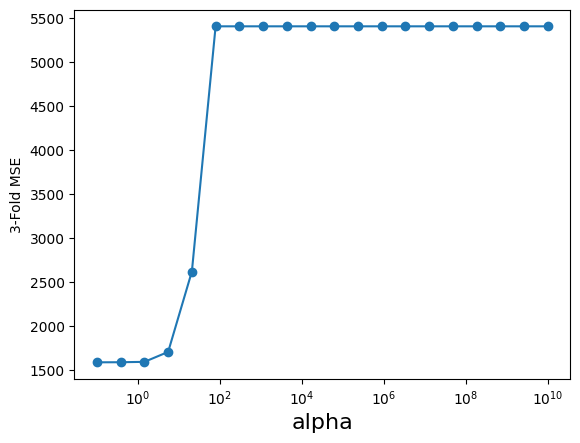

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(Xtrain_final, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(Xtrain_final,y_train)

ytrainLasso = lasso.predict(Xtrain_final)
ytestLasso  = lasso.predict(Xtest_final)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = Xtrain_final.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.55e+03
MSE Modelo Lasso (test) : 1.41e+03
RMSE Modelo Lasso (train): 39.4
RMSE Modelo Lasso (test) : 37.5
Smart Location 4.29140694371101
Latitude 17.114709178320606
Longitude -1.7831739919404084
Property Type -0.0632269403981376
Bathrooms 0.09371927230607686
Bedrooms 6.130130526192933
Beds 9.80021499285552
Security Deposit 2.0964441480324423
Cleaning Fee 10.190655042600921
Guests Included 33.746372973892946
Extra People 2.6908545227089706
Minimum Nights 0.7309864494303696
Maximum Nights -1.781014955287155
Number of Reviews 0.0
Room Type_Private room -0.19082579464443647
Room Type_Shared room -15.114706754645292


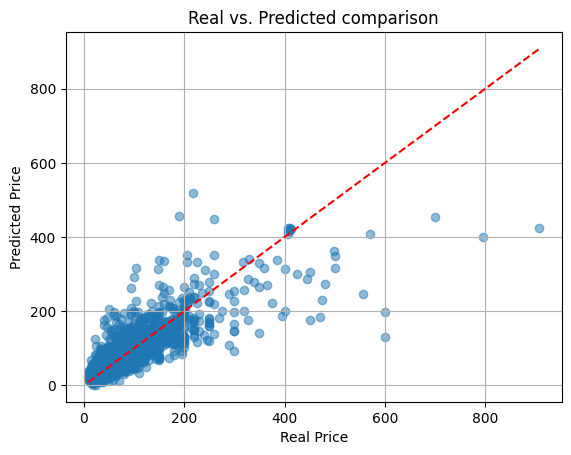

In [17]:
import matplotlib.pyplot as plt

plt.scatter(y_test, ytestLasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Real vs. Predicted comparison')
plt.grid(True)
plt.show()

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................

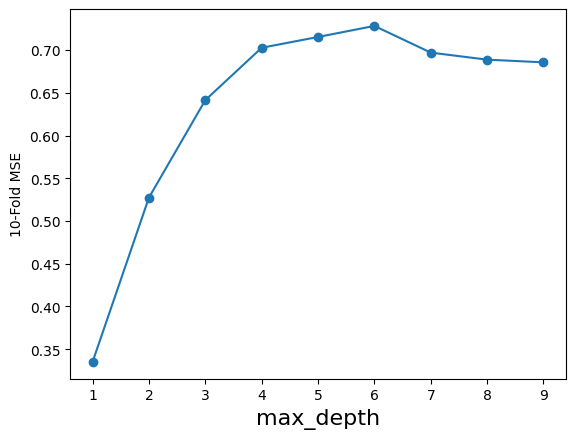

In [30]:
from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(Xtrain_final, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()


In [31]:
Xtrain_final = X_train
Xtest_final = X_test

In [32]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.806757340813186
Test:  0.6884379255579035


In [ ]:

feature_names = X_train.columns.tolist() 

<function matplotlib.pyplot.show(close=None, block=None)>

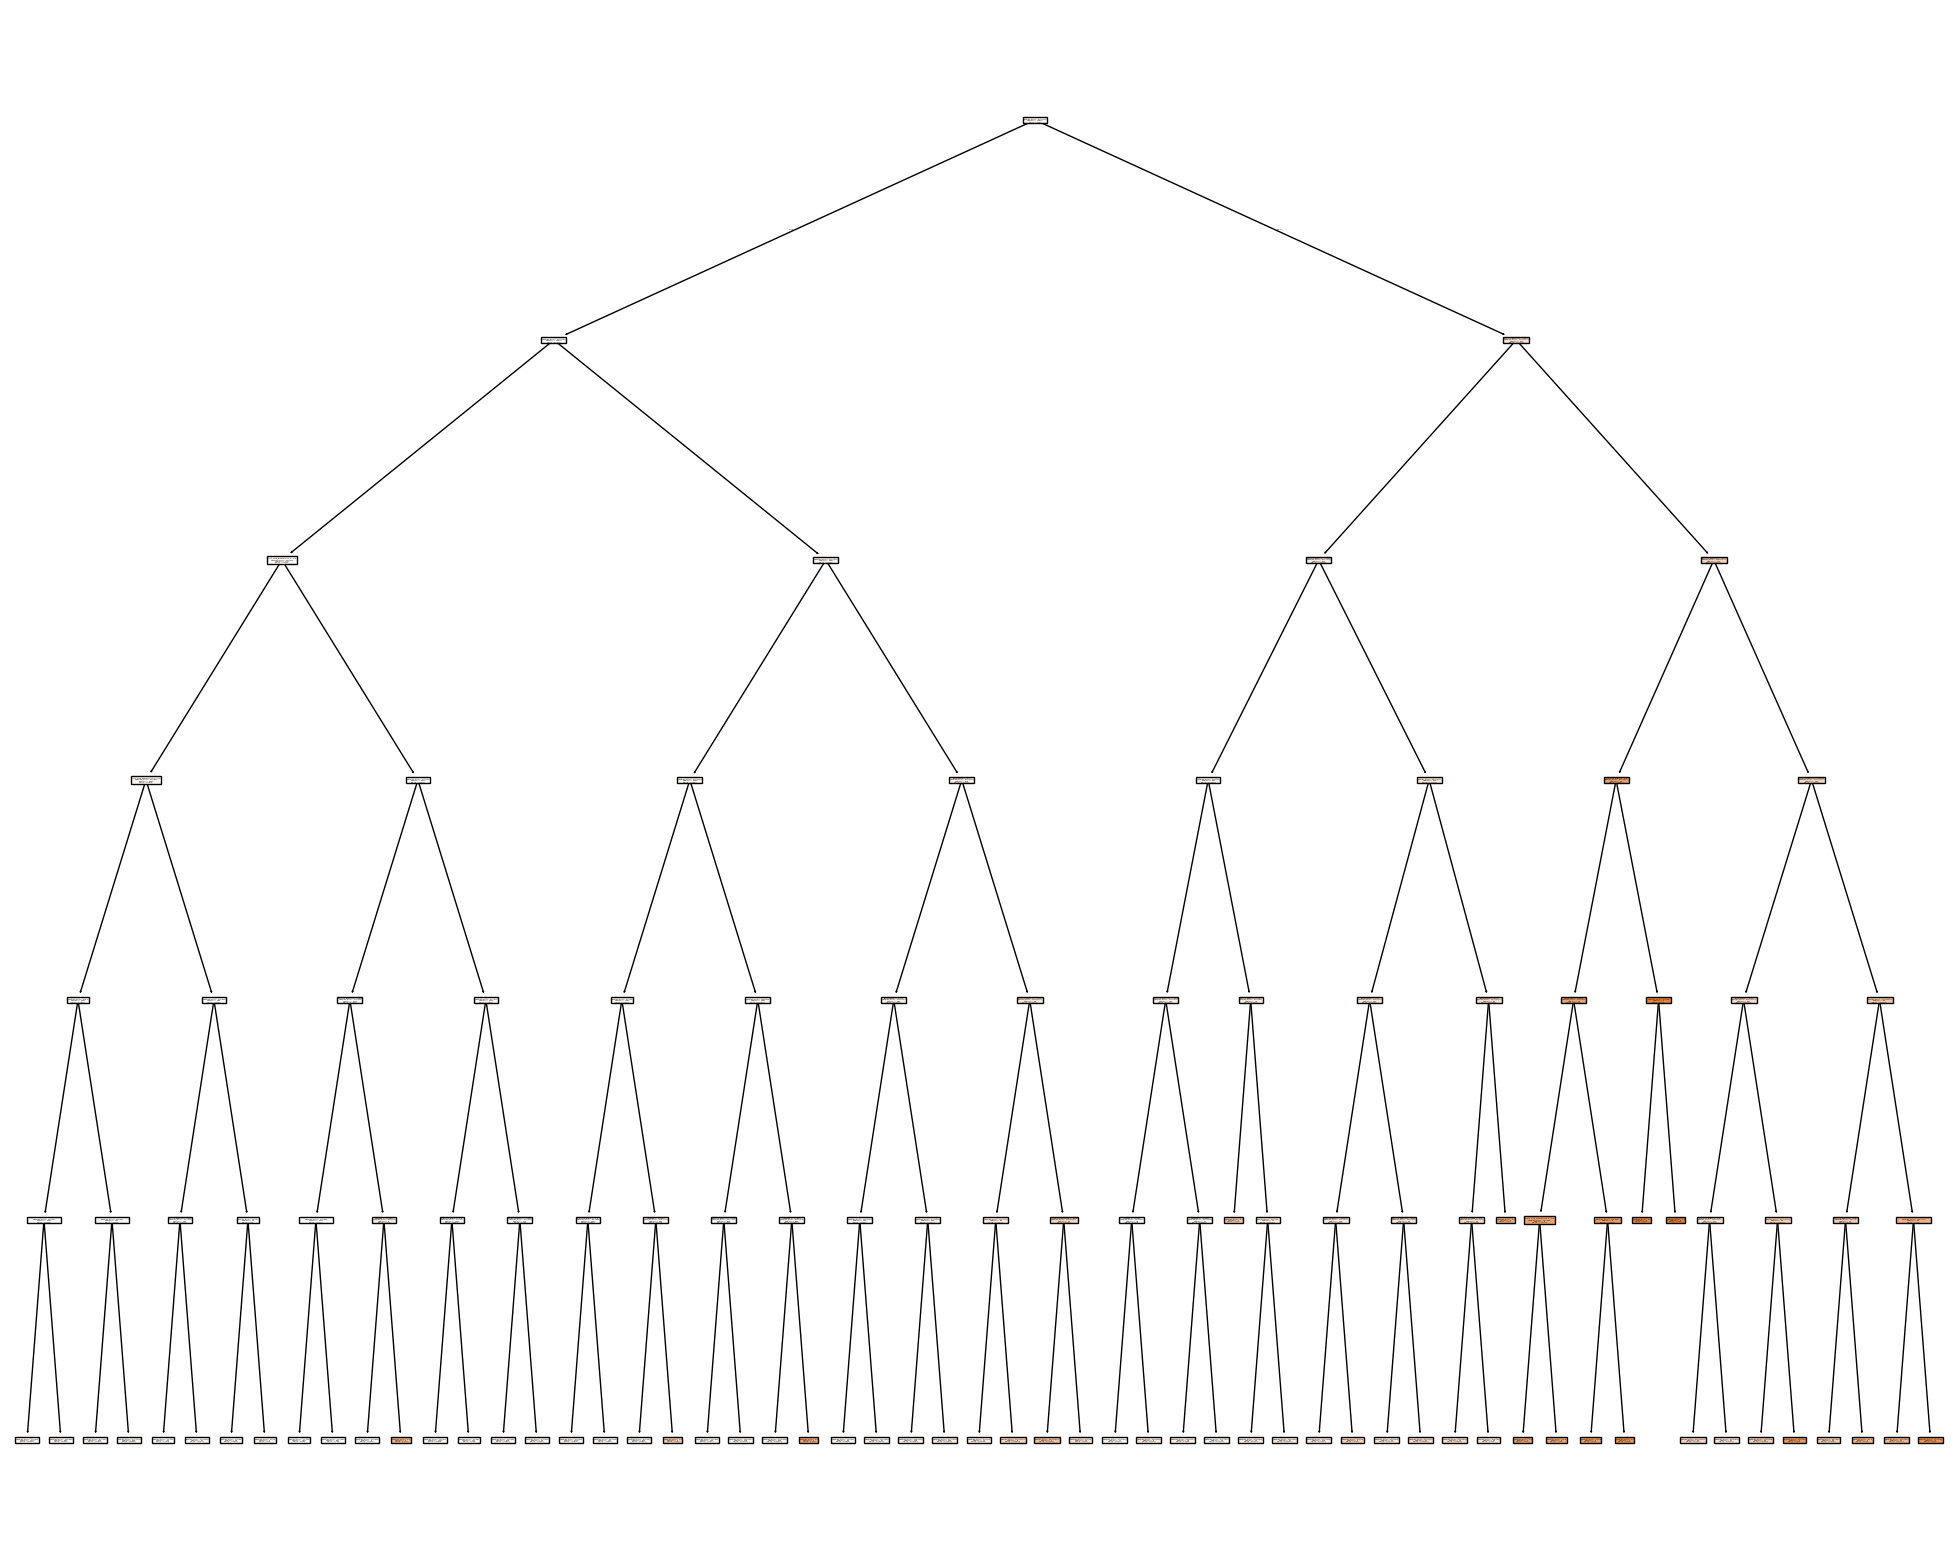

In [39]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(treeModel, feature_names=feature_names, filled=True)
plt.show

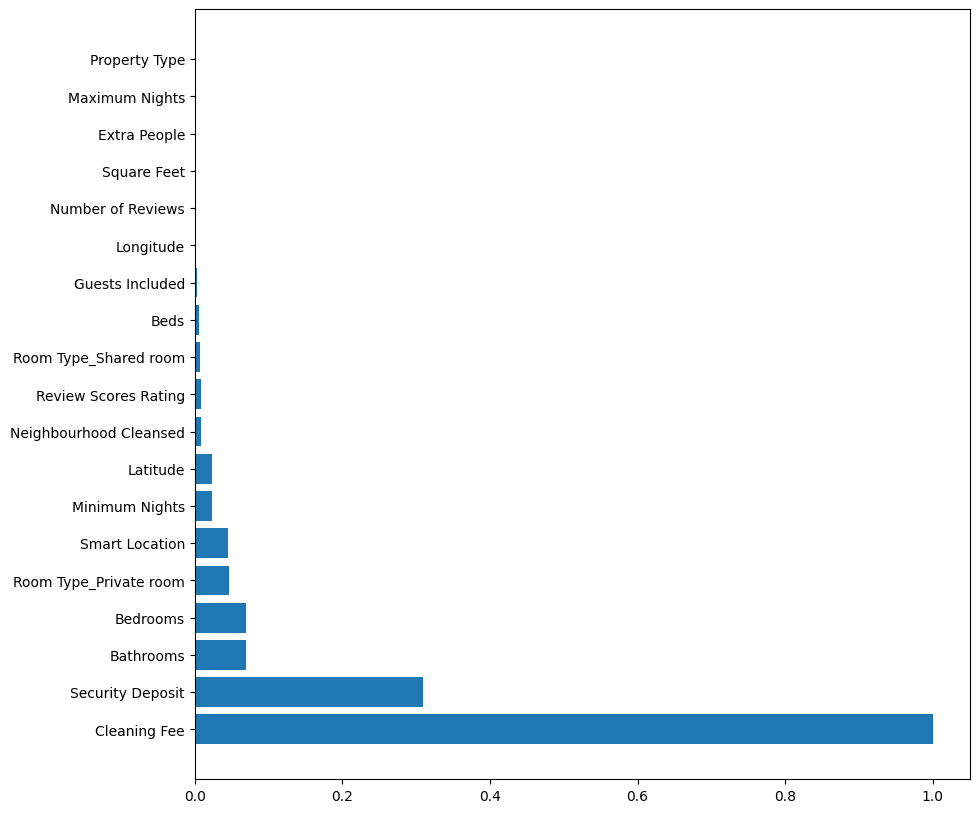

In [42]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), feature_names[indices])
plt.show()

In [21]:

# Scatter plot: Real vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'y_pred' is not defined

<Figure size 800x600 with 0 Axes>